In [20]:
import os
from PIL import Image
import numpy as np

# Define the common size and color mode for all images
common_size = (256, 256)
common_color_mode = 'RGB'

dataset = []

main_folder = "Images"

for folder_name in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            image = Image.open(image_path)

            # Resize the image to the common size
            image = image.resize(common_size)
            
            # Convert the image to the common color mode
            image = image.convert(common_color_mode)
            
            label = folder_name
            dataset.append((image, label))

# Now you have a dataset where each entry is a tuple (image, label).

# Convert the dataset to NumPy arrays
images = [np.array(entry[0]) for entry in dataset]
labels = [entry[1] for entry in dataset]
images = np.array(images)
labels = np.array(labels)

In [21]:
dataset


[(<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=256x256>, 'Combat'),
 (<PIL.Image.Image image mode=RGB size=2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (320, 256, 256, 3)
y_train shape: (320,)
X_test shape: (80, 256, 256, 3)
y_test shape: (80,)


In [35]:

y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)
y_train_reshaped.shape

(320, 1)

In [27]:
combat = "combat"
rehab = "humanitarianaid"
military_vehicles = "militaryvehicles"
fire = "fire"
destroyed_building = "destroyedbuilding"

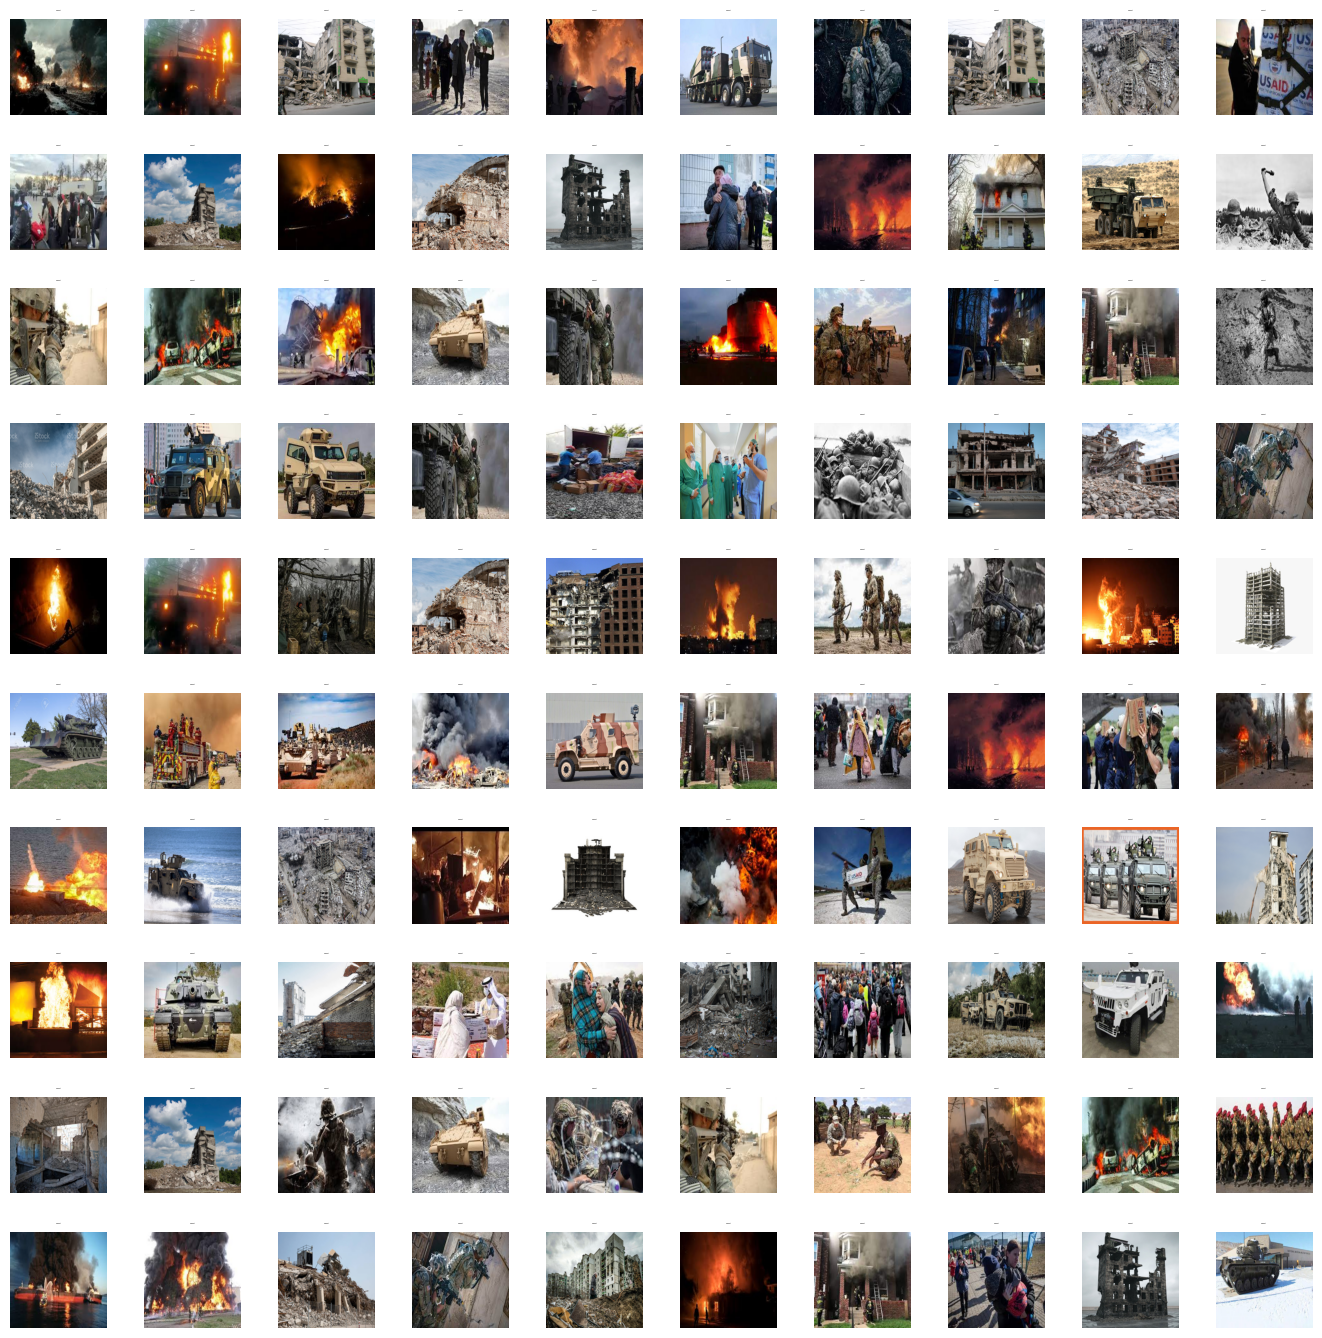

In [25]:

W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train_int[index])
    axes[i].set_title(labels[label_index],fontsize=0.8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [28]:
label = ['Combat','DestroyedBuildings','Fire','Humanitarian Aid and rehabilitation','Military vehicles and weapons']
arr = [combat,rehab,military_vehicles,fire,destroyed_building]
for i in range(5):
    for j in range(80):
        mask = (labels == label[i])
        labels[mask] = arr[i]

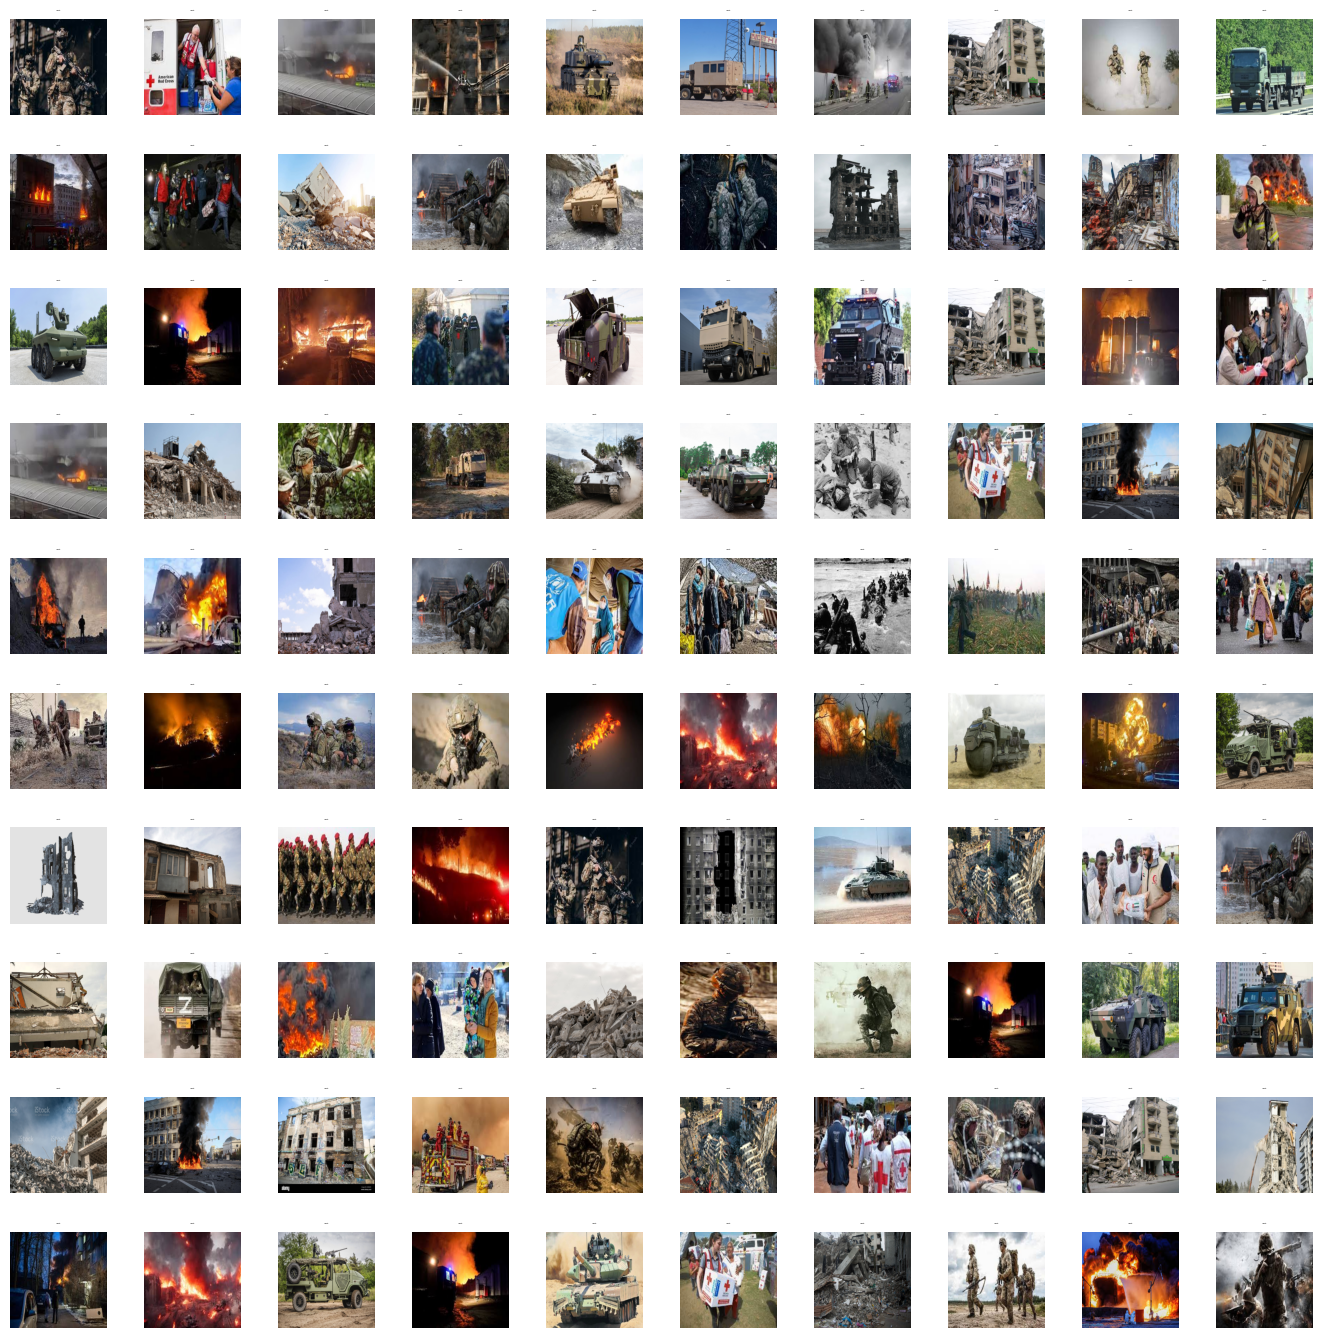

In [29]:

W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train_int[index])
    axes[i].set_title(labels[label_index],fontsize=0.8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [30]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train_int, 10)
y_cat_test = to_categorical(y_test_int, 10)

In [33]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=1024, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=1024, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 256)     7168      
                                                                 
 batch_normalization_6 (Bat  (None, 256, 256, 256)     1024      
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 256)     590080    
                                                                 
 batch_normalization_7 (Bat  (None, 256, 256, 256)     1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 256)     0         
 g2D)                                                            
                                                      

C:\Users\rites\miniconda3\envs\GG_3831\lib\site-packages\keras\src\utils\layer_utils.py:146: RuntimeWarning: overflow encountered in scalar multiply
  total_memory_size += weight_shape * per_param_size


In [36]:
batch_size = 256
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [ ]:
r = model.fit(train_generator,
              epochs=5,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
             # callbacks=[early_stop],
              # batch_size=batch_size,
              )